In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv("TravelInsurancePrediction.csv")
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1987.0,993.000000,573.741812,0.0,496.5,993.0,1489.5,1986.0
Age,1987.0,29.650226,2.913308,25.0,28.0,29.0,32.0,35.0
AnnualIncome,1987.0,932762.959235,376855.684748,300000.0,600000.0,900000.0,1250000.0,1800000.0
FamilyMembers,1987.0,4.752894,1.609650,2.0,4.0,5.0,6.0,9.0
ChronicDiseases,1987.0,0.277806,0.448030,0.0,0.0,0.0,1.0,1.0
TravelInsurance,1987.0,0.357323,0.479332,0.0,0.0,0.0,1.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [5]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i]=pd.Categorical(df[i]).codes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Unnamed: 0           1987 non-null   int64
 1   Age                  1987 non-null   int64
 2   Employment Type      1987 non-null   int8 
 3   GraduateOrNot        1987 non-null   int8 
 4   AnnualIncome         1987 non-null   int64
 5   FamilyMembers        1987 non-null   int64
 6   ChronicDiseases      1987 non-null   int64
 7   FrequentFlyer        1987 non-null   int8 
 8   EverTravelledAbroad  1987 non-null   int8 
 9   TravelInsurance      1987 non-null   int64
dtypes: int64(6), int8(4)
memory usage: 101.0 KB


In [6]:
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,0,1,400000,6,1,0,0,0
1,1,31,1,1,1250000,7,0,0,0,0
2,2,34,1,1,500000,4,1,0,0,1
3,3,28,1,1,700000,3,1,0,0,0
4,4,28,1,1,700000,8,1,1,0,0


In [7]:
df.drop(df.loc[:,df.columns.str.contains('Unnamed')],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Age                  1987 non-null   int64
 1   Employment Type      1987 non-null   int8 
 2   GraduateOrNot        1987 non-null   int8 
 3   AnnualIncome         1987 non-null   int64
 4   FamilyMembers        1987 non-null   int64
 5   ChronicDiseases      1987 non-null   int64
 6   FrequentFlyer        1987 non-null   int8 
 7   EverTravelledAbroad  1987 non-null   int8 
 8   TravelInsurance      1987 non-null   int64
dtypes: int64(5), int8(4)
memory usage: 85.5 KB


In [9]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0


In [10]:
df['TravelInsurance'].value_counts()

0    1277
1     710
Name: TravelInsurance, dtype: int64

In [11]:
x = df.drop('TravelInsurance',axis=1)
y = df.pop('TravelInsurance')

In [12]:
y.shape

(1987,)

## Perform EDA

## Random Forest

In [13]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.1,random_state=1)

In [14]:
param_grid = { 'max_depth' : [10,13,15],
             'max_features': [4,6,9],
             'min_samples_leaf': [20,30,50],
             'min_samples_split':[100,120,150],
             'n_estimators':[501,601,701]
             }
rf = RandomForestClassifier()
GridSearchCV = GridSearchCV(estimator=rf, param_grid=param_grid,cv=3)

In [15]:
GridSearchCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 13, 15], 'max_features': [4, 6, 9],
                         'min_samples_leaf': [20, 30, 50],
                         'min_samples_split': [100, 120, 150],
                         'n_estimators': [501, 601, 701]})

In [16]:
best_grid = GridSearchCV.best_estimator_
best_grid

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=20,
                       min_samples_split=100, n_estimators=501)

In [25]:
best_grid.score(x_train,y_train)

0.8333333333333334

In [26]:
best_grid.score(x_test,y_test)

0.8140703517587939

In [17]:
y_train_predict = best_grid.predict(x_train)

In [18]:
y_test_predict = best_grid.predict(x_test)

In [19]:
confusion_matrix(y_train,y_train_predict)

array([[1107,   42],
       [ 256,  383]], dtype=int64)

In [20]:
print(classification_report(y_train,y_train_predict))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      1149
           1       0.90      0.60      0.72       639

    accuracy                           0.83      1788
   macro avg       0.86      0.78      0.80      1788
weighted avg       0.84      0.83      0.82      1788



In [21]:
confusion_matrix(y_test,y_test_predict)

array([[125,   3],
       [ 34,  37]], dtype=int64)

In [22]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.79      0.98      0.87       128
           1       0.93      0.52      0.67        71

    accuracy                           0.81       199
   macro avg       0.86      0.75      0.77       199
weighted avg       0.84      0.81      0.80       199



0.8629678661856062


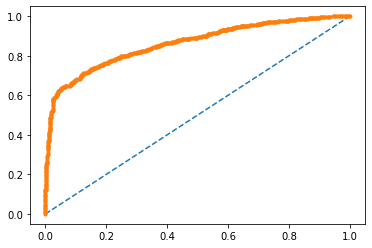

In [23]:
probs = best_grid.predict_proba(x_train)
probs = probs[:,1]
auc = roc_auc_score(y_train,probs)
print(auc)
fpr,tpr,threshold =roc_curve(y_train,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')
plt.show()

0.7970950704225352


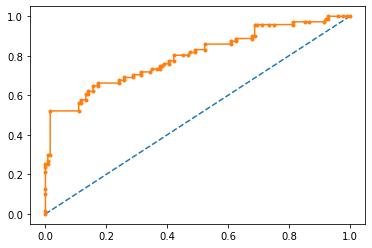

In [24]:
probs = best_grid.predict_proba(x_test)
probs = probs[:,1]
auc = roc_auc_score(y_test,probs)
print(auc)
fpr, tpr, threshold = roc_curve(y_test,probs)
plt.plot([0,1],[0,1],linestyle='--')
plt.plot(fpr,tpr,marker='.')

## CART